In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split

In [2]:
features_num = 1
num = 220

In [3]:
Train_dataset = np.loadtxt('trainset(2)/J0003_0024_0222_20110307012737_cell_7.csv',delimiter=",", skiprows=1)
Test_dataset = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_03.csv',delimiter=",", skiprows=1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Train_dataset = scaler.fit_transform(Train_dataset)
Test_dataset = scaler.fit_transform(Test_dataset)
print(Train_dataset)

X_train = Train_dataset[:, 0:features_num]
Y_train = Train_dataset[:, 0]



[[0.         0.         0.        ]
 [0.00291545 0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.00291545 0.         0.        ]
 [0.00291545 0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.00874636 0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.00874636 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.00874636 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.01457726 0.         0.        ]
 [0.01749271 0.         0.        ]
 [0.02332362 0.         0.        ]
 [0.02332362 0.         0.        ]
 [0.02332362 0.         0.        ]
 [0.02623907 0.         0.        ]
 [0.02040816 0.         0.  

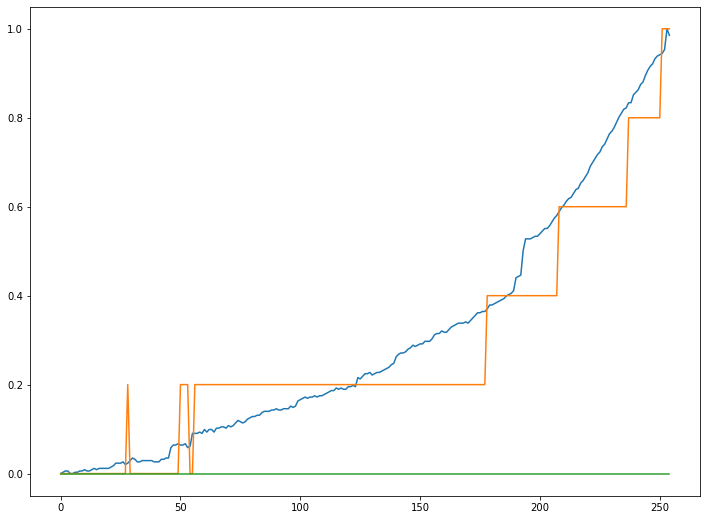

In [4]:
X_test = Train_dataset[num:250, 0:features_num]
Y_test = Train_dataset[num:250, 0]
r_x_test = Test_dataset[:,0:features_num]
r_y_test = Test_dataset[:,0]
plt.figure(figsize=(12, 9))
plt.plot(Train_dataset)

In [5]:
def make_dataset(data, label, window_size=10):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data[i:i+window_size]))
        label_list.append(np.array(label[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [6]:
train_feature, train_label = make_dataset(X_train, Y_train, 10)

In [7]:
test_feature, test_label = make_dataset(r_x_test, r_y_test, 10)

test_feature.shape, test_label.shape
print(test_feature.shape, test_label.shape)

(248, 10, 1) (248,)


In [8]:
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
print(x_train.shape, x_valid.shape)

(196, 10, 1) (49, 10, 1)


In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.GRU(32,
               input_shape=(train_feature.shape[1], train_feature.shape[2]),
               activation='relu',
               return_sequences=False)
          )
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(1))

In [10]:
model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(lr=0.01),
                metrics=[tf.metrics.MeanAbsoluteError()])
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=500, mode='min')
filename = os.path.join('models/', 'tmp_checkpointcell7_GRU_onefeature.h5')
checkpoint = tf.keras.callbacks.ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [11]:
history = model.fit(x_train, y_train,
                                    epochs=50,
                                    batch_size=1, steps_per_epoch=200,
                                    validation_data=(x_valid, y_valid),
                                    callbacks=[checkpoint])

Epoch 1/50
200/200 [==============================] - 5s 13ms/step - loss: 0.0473 - mean_absolute_error: 0.0987 - val_loss: 8.7945e-05 - val_mean_absolute_error: 0.0084

Epoch 00001: val_loss improved from inf to 0.00009, saving model to models\tmp_checkpointcell7_GRU_onefeature.h5
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 9.0498e-04 - mean_absolute_error: 0.0228 - val_loss: 9.6004e-05 - val_mean_absolute_error: 0.0088

Epoch 00002: val_loss did not improve from 0.00009
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0031 - mean_absolute_error: 0.0365 - val_loss: 9.8379e-04 - val_mean_absolute_error: 0.0289

Epoch 00003: val_loss did not improve from 0.00009
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 4.6260e-04 - mean_absolute_error: 0.0157 - val_loss: 4.1234e-04 - val_mean_absolute_error: 0.0141

Epoch 00004: val_loss did not improve from 0.00009
Epoch 5/50
200/200 [=============================

200/200 [==============================] - 0s 2ms/step - loss: 2.6983e-04 - mean_absolute_error: 0.0124 - val_loss: 1.5529e-04 - val_mean_absolute_error: 0.0118

Epoch 00036: val_loss did not improve from 0.00003
Epoch 37/50
200/200 [==============================] - 0s 2ms/step - loss: 2.1295e-04 - mean_absolute_error: 0.0106 - val_loss: 2.0458e-04 - val_mean_absolute_error: 0.0103

Epoch 00037: val_loss did not improve from 0.00003
Epoch 38/50
200/200 [==============================] - 0s 2ms/step - loss: 6.2941e-04 - mean_absolute_error: 0.0189 - val_loss: 4.2602e-04 - val_mean_absolute_error: 0.0150

Epoch 00038: val_loss did not improve from 0.00003
Epoch 39/50
200/200 [==============================] - 0s 2ms/step - loss: 1.9859e-04 - mean_absolute_error: 0.0110 - val_loss: 1.4418e-04 - val_mean_absolute_error: 0.0114

Epoch 00039: val_loss did not improve from 0.00003
Epoch 40/50
200/200 [==============================] - 1s 3ms/step - loss: 1.4338e-04 - mean_absolute_error: 0.0

In [12]:
model.load_weights(filename)
pred = model.predict(test_feature)
print(pred)

[[0.07232417]
 [0.13347498]
 [0.14702085]
 [0.15025255]
 [0.11308204]
 [0.0666002 ]
 [0.1321455 ]
 [0.10852613]
 [0.14164492]
 [0.07302622]
 [0.09524668]
 [0.10008262]
 [0.1012214 ]
 [0.13986072]
 [0.07253025]
 [0.09510691]
 [0.10004034]
 [0.13956293]
 [0.18440858]
 [0.23150662]
 [0.24169388]
 [0.24413994]
 [0.24478427]
 [0.13494626]
 [0.1842989 ]
 [0.1943981 ]
 [0.19665053]
 [0.16140696]
 [0.1897199 ]
 [0.19560719]
 [0.16115165]
 [0.1896528 ]
 [0.2706171 ]
 [0.21311337]
 [0.201195  ]
 [0.16263121]
 [0.19006811]
 [0.30882478]
 [0.29562235]
 [0.33138394]
 [0.33883294]
 [0.34060556]
 [0.34107938]
 [0.34121877]
 [0.34126267]
 [0.34127742]
 [0.41841394]
 [0.3950759 ]
 [0.42994747]
 [0.3979218 ]
 [0.4679363 ]
 [0.51946694]
 [0.5299269 ]
 [0.5324552 ]
 [0.4581408 ]
 [0.4438627 ]
 [0.44054988]
 [0.47704408]
 [0.48422295]
 [0.40952733]
 [0.4336356 ]
 [0.3990045 ]
 [0.46828163]
 [0.44455305]
 [0.47776368]
 [0.52188057]
 [0.49325946]
 [0.5255269 ]
 [0.56943613]
 [0.5029901 ]
 [0.5279268 ]
 [0.53

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 32)                3360      
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 4,449
Trainable params: 4,449
Non-trainable params: 0
_________________________________________________________________


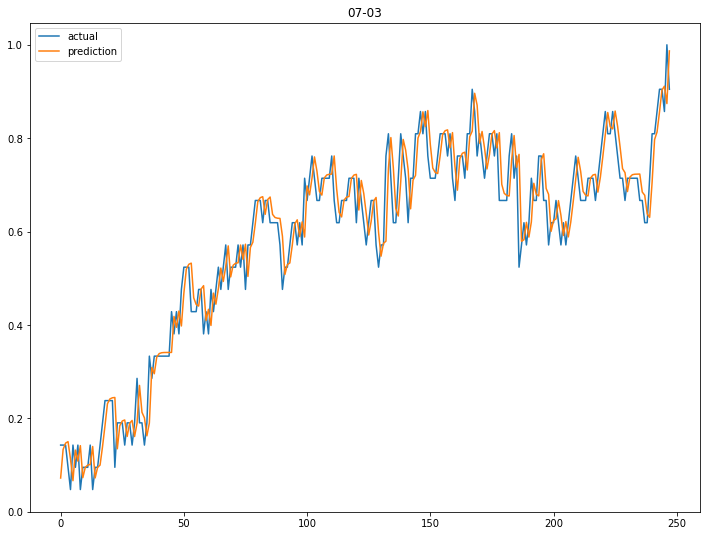

In [13]:
model.summary()

plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.title('07-03')
plt.savefig('savefig/cell7/07-03.png')
plt.legend()
plt.show()

In [14]:
loop = len(test_label)
for i in range(loop):
    error_avg = 0
    error = abs((test_label[i] - pred[i])/test_label[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

[0.03661534]


In [15]:
test_ds2 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_23.csv',delimiter=",", skiprows=1)

test_ds2 = scaler.fit_transform(test_ds2)
x_test2 = test_ds2[:, 1:2]
y_test2 = test_ds2[:, 1]

In [16]:
test_feature2, test_label2 = make_dataset(x_test2, y_test2, 10)

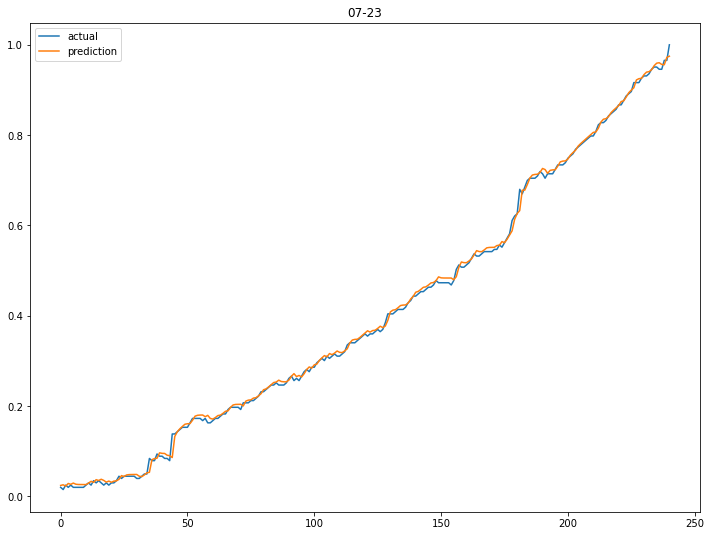

[0.01050053]


In [17]:
pred2 = model.predict(test_feature2)

plt.figure(figsize=(12, 9))
plt.plot(test_label2, label='actual')
plt.plot(pred2, label='prediction')
plt.title('07-23')
plt.savefig('savefig/cell7/07-23.png')
plt.legend()
plt.show()
loop = len(test_label2)
for i in range(loop):
    error_avg = 0
    error = abs((test_label2[i] - pred2[i])/test_label2[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

[0.00023343]


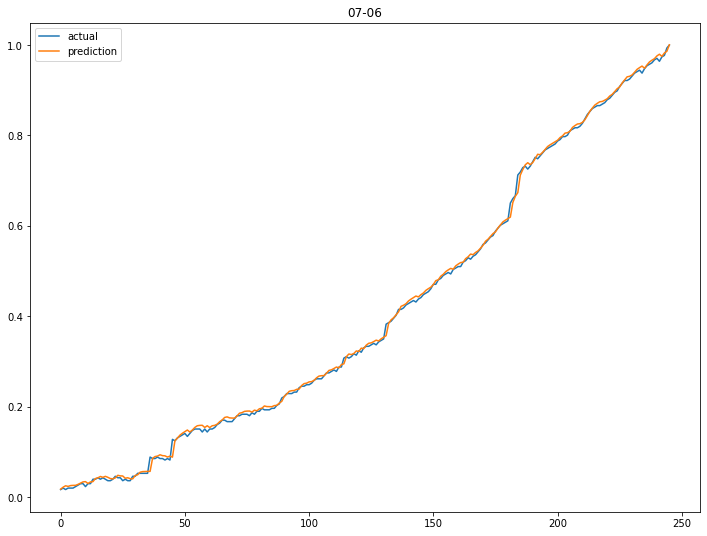

In [18]:
test_ds3 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_06.csv',delimiter=",", skiprows=1)

test_ds3 = scaler.fit_transform(test_ds3)
x_test3 = test_ds3[:, 1:2]
y_test3 = test_ds3[:, 1]
test_feature3, test_label3 = make_dataset(x_test3, y_test3, 10)

pred3 = model.predict(test_feature3)

loop = len(test_label3)
for i in range(loop):
    error_avg = 0
    error = abs((test_label3[i] - pred3[i])/test_label3[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label3, label='actual')
plt.plot(pred3, label='prediction')
plt.title('07-06')
plt.savefig('savefig/cell7/07-06.png')
plt.legend()
plt.show()


[0.00777153]


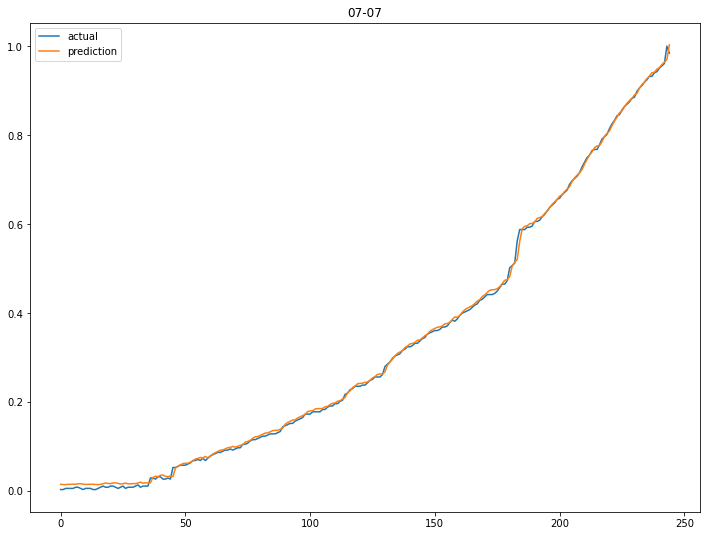

In [19]:
test_ds4 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_7.csv',delimiter=",", skiprows=1)
test_ds4 = scaler.fit_transform(test_ds4)
x_test4 = test_ds4[:, 1:2]
y_test4 = test_ds4[:, 1]
test_feature4, test_label4 = make_dataset(x_test4, y_test4, 10)

pred4 = model.predict(test_feature4)
loop = len(test_label4)
for i in range(loop):
    error_avg = 0
    error = abs((test_label4[i] - pred4[i])/test_label4[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label4, label='actual')
plt.plot(pred4, label='prediction')
plt.title('07-07')
plt.savefig('savefig/cell7/07-07.png')
plt.legend()
plt.show()

[0.01531822]


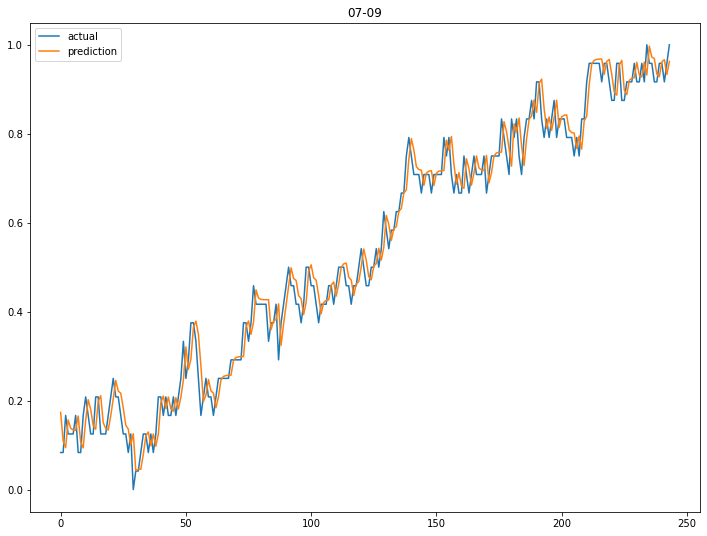

In [20]:
test_ds5 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_9.csv',delimiter=",", skiprows=1)
test_ds5 = scaler.fit_transform(test_ds5)
x_test5 = test_ds5[:, 1:2]
y_test5 = test_ds5[:, 1]
test_feature5, test_label5 = make_dataset(x_test5, y_test5, 10)

pred5 = model.predict(test_feature5)

loop = len(test_label5)
for i in range(loop):
    error_avg = 0
    if test_label5[i]!=0:
        error = abs((test_label5[i] - pred5[i])/test_label5[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label5, label='actual')
plt.plot(pred5, label='prediction')
plt.title('07-09')
plt.savefig('savefig/cell7/07-09.png')
plt.legend()
plt.show()

[0.00360416]


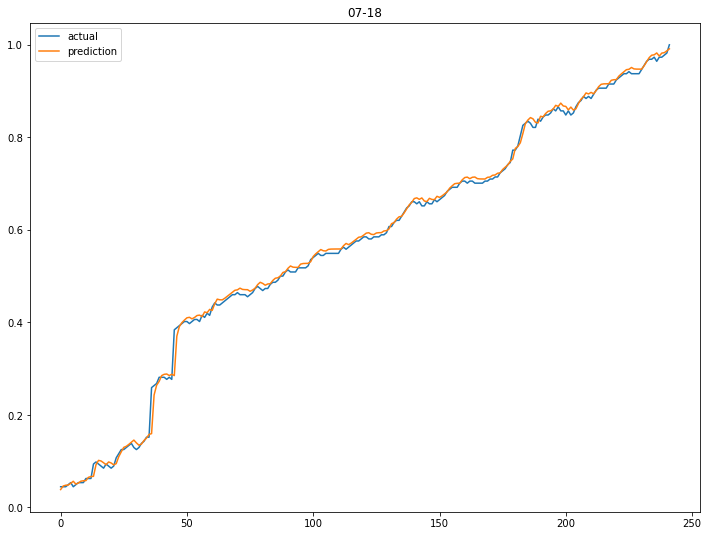

In [21]:
test_ds6 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_18.csv',delimiter=",", skiprows=1)
test_ds6 = scaler.fit_transform(test_ds6)
x_test6 = test_ds6[:, 1:2]
y_test6 = test_ds6[:, 1]
test_feature6, test_label6 = make_dataset(x_test6, y_test6, 10)

pred6 = model.predict(test_feature6)

loop = len(test_label6)
for i in range(loop):
    error_avg = 0
    error = abs((test_label6[i] - pred6[i])/test_label6[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label6, label='actual')
plt.plot(pred6, label='prediction')
plt.title('07-18')
plt.savefig('savefig/cell7/07-18.png')
plt.legend()
plt.show()

[0.10174242]


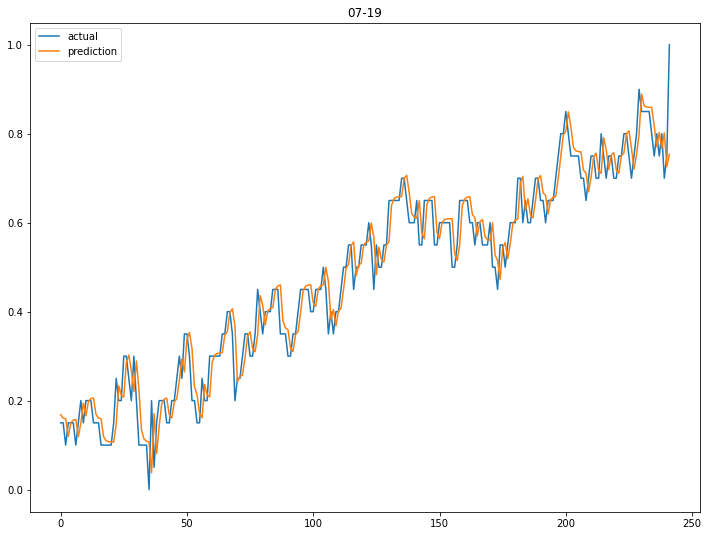

In [22]:
test_ds7 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_19.csv',delimiter=",", skiprows=1)
test_ds7 = scaler.fit_transform(test_ds7)
x_test7 = test_ds7[:, 1:2]
y_test7 = test_ds7[:, 1]
test_feature7, test_label7 = make_dataset(x_test7, y_test7, 10)

pred7 = model.predict(test_feature7)

loop = len(test_label7)
for i in range(loop):
    error_avg = 0
    if test_label7[i]!=0:
        error = abs((test_label7[i] - pred7[i])/test_label7[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label7, label='actual')
plt.plot(pred7, label='prediction')
plt.title('07-19')
plt.savefig('savefig/cell7/07-19.png')
plt.legend()
plt.show()

[0.00386776]


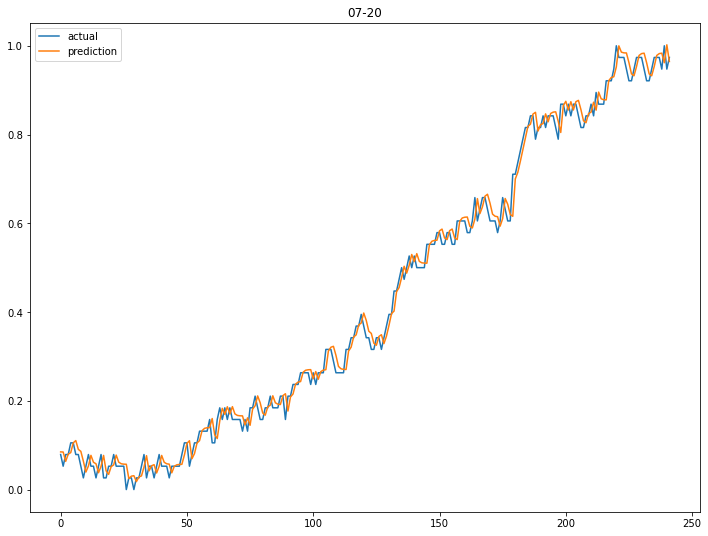

In [23]:
test_ds7 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_20.csv',delimiter=",", skiprows=1)
test_ds7 = scaler.fit_transform(test_ds7)
x_test7 = test_ds7[:, 1:2]
y_test7 = test_ds7[:, 1]
test_feature7, test_label7 = make_dataset(x_test7, y_test7, 10)

pred7 = model.predict(test_feature7)

loop = len(test_label7)
for i in range(loop):
    error_avg = 0
    if test_label7[i]!=0:
        error = abs((test_label7[i] - pred7[i])/test_label7[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label7, label='actual')
plt.plot(pred7, label='prediction')
plt.title('07-20')
plt.savefig('savefig/cell7/07-20.png')
plt.legend()
plt.show()

(251, 4)
[0.02205469]


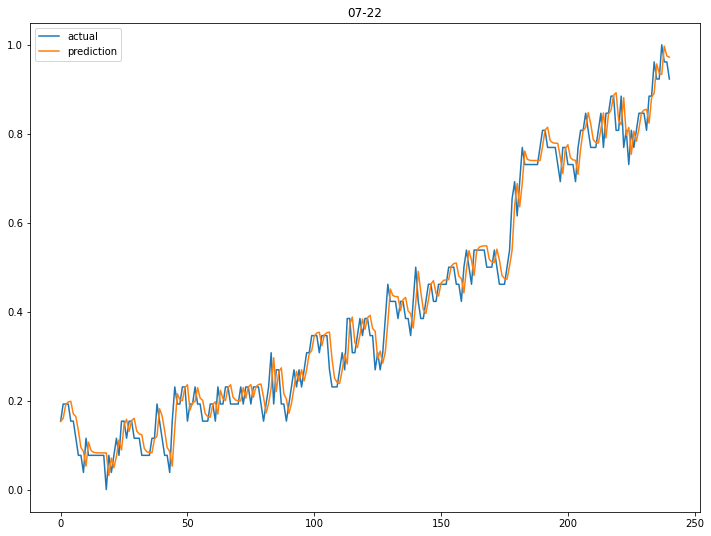

In [24]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_22.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)

pred8 = model.predict(test_feature8)

loop = len(test_label8)
for i in range(loop):
    error_avg = 0
    if test_label8[i]!=0:
        error = abs((test_label8[i] - pred8[i])/test_label8[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label8, label='actual')
plt.plot(pred8, label='prediction')
plt.title('07-22')
plt.savefig('savefig/cell7/07-22.png')
plt.legend()
plt.show()

In [25]:
print(pred8.shape)
print(test_feature8.shape)

(241, 1)
(241, 10, 1)


In [26]:
def predict_next_timestamp(model, history):
    """Predict the next time stamp given a sequence of history data"""

    prediction = model.predict(history)
    prediction = np.reshape(prediction, (prediction.size,))
    return prediction

In [27]:
xhat = test_feature8[0]
xxhat = np.array([xhat])
print(xxhat.shape)
tttest=model.predict(xxhat)

(1, 10, 1)


In [28]:
testpred = np.zeros((300,1))
testpred.shape


(300, 1)

In [29]:

for i in range(300):
    expred = model.predict(np.array([xhat]))
    testpred[i] = expred
    xhat = np.vstack([xhat[1:],expred])

print(testpred.shape)
'''
i=0
expred = model.predict(np.array([xhat]))
testpred[i] = expred
xhat = np.vstack([xhat[1:],expred])

testpred.shape'''
'''
xhat = test_feature8
test1 = np.zeros((20,10,1))
print(test1.shape, xhat.shape)
testfe = np.concatenate((xhat,test1), axis=0)
testfe.shape'''

(300, 1)


'\nxhat = test_feature8\ntest1 = np.zeros((20,10,1))\nprint(test1.shape, xhat.shape)\ntestfe = np.concatenate((xhat,test1), axis=0)\ntestfe.shape'

In [31]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_22.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 10)

for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[240].reshape((1,1))
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    x_test8 = x_test8[1:]
    y_test8 = y_test8[1:]
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)



(251, 4)
[array([[0.97214013]], dtype=float32)]
(1, 1)
(251, 1) (251, 1)
(251, 1) (251, 1)
[array([[0.9397903]], dtype=float32)]
(1, 1)
(251, 1) (251, 1)
(251, 1) (251, 1)
[array([[0.97531193]], dtype=float32)]
(1, 1)
(251, 1) (251, 1)
(251, 1) (251, 1)
[array([[0.95376617]], dtype=float32)]
(1, 1)
(251, 1) (251, 1)
(251, 1) (251, 1)
[array([[0.98011184]], dtype=float32)]
(1, 1)
(251, 1) (251, 1)
(251, 1) (251, 1)
[array([[0.96623313]], dtype=float32)]
(1, 1)
(251, 1) (251, 1)
(251, 1) (251, 1)
[array([[0.98617476]], dtype=float32)]
(1, 1)
(251, 1) (251, 1)
(251, 1) (251, 1)
[array([[0.97770745]], dtype=float32)]
(1, 1)
(251, 1) (251, 1)
(251, 1) (251, 1)
[array([[0.99315006]], dtype=float32)]
(1, 1)
(251, 1) (251, 1)
(251, 1) (251, 1)
[array([[0.98850256]], dtype=float32)]
(1, 1)
(251, 1) (251, 1)
(251, 1) (251, 1)
[array([[1.0007912]], dtype=float32)]
(1, 1)
(251, 1) (251, 1)
(251, 1) (251, 1)
[array([[0.9988497]], dtype=float32)]
(1, 1)
(251, 1) (251, 1)
(251, 1) (251, 1)
[array([[1

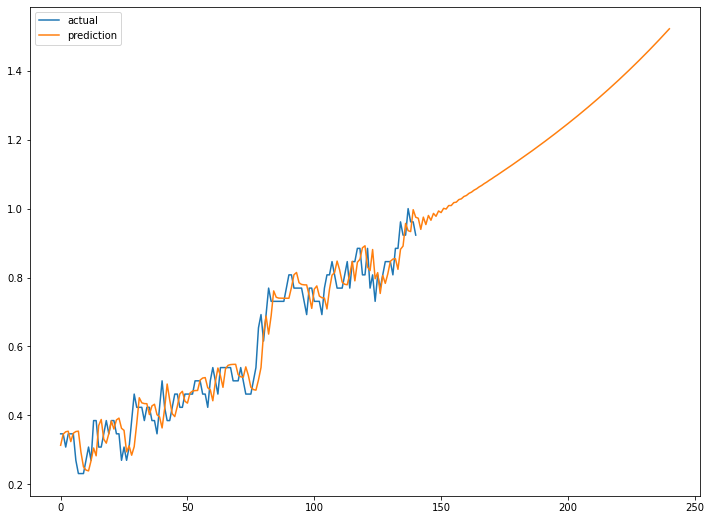

In [32]:
ac_test_label8 = ac_test_label8[100:]

plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.legend()
plt.show()

In [76]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_22.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 10)
x_test8 = test_ds8[:200, 1:2]
y_test8 = test_ds8[:200, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)


for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[pred_len-1].reshape((1,1))
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)



(251, 4)
[array([[0.7397614]], dtype=float32)]
(1, 1)
(201, 1) (201, 1)
(201, 1) (201, 1)
[array([[0.77112705]], dtype=float32)]
(1, 1)
(202, 1) (202, 1)
(202, 1) (202, 1)
[array([[0.75252944]], dtype=float32)]
(1, 1)
(203, 1) (203, 1)
(203, 1) (203, 1)
[array([[0.77518433]], dtype=float32)]
(1, 1)
(204, 1) (204, 1)
(204, 1) (204, 1)
[array([[0.76382405]], dtype=float32)]
(1, 1)
(205, 1) (205, 1)
(205, 1) (205, 1)
[array([[0.78054756]], dtype=float32)]
(1, 1)
(206, 1) (206, 1)
(206, 1) (206, 1)
[array([[0.77409536]], dtype=float32)]
(1, 1)
(207, 1) (207, 1)
(207, 1) (207, 1)
[array([[0.7867933]], dtype=float32)]
(1, 1)
(208, 1) (208, 1)
(208, 1) (208, 1)
[array([[0.7836786]], dtype=float32)]
(1, 1)
(209, 1) (209, 1)
(209, 1) (209, 1)
[array([[0.79364324]], dtype=float32)]
(1, 1)
(210, 1) (210, 1)
(210, 1) (210, 1)
[array([[0.79280525]], dtype=float32)]
(1, 1)
(211, 1) (211, 1)
(211, 1) (211, 1)
[array([[0.8009111]], dtype=float32)]
(1, 1)
(212, 1) (212, 1)
(212, 1) (212, 1)
[array([[0.

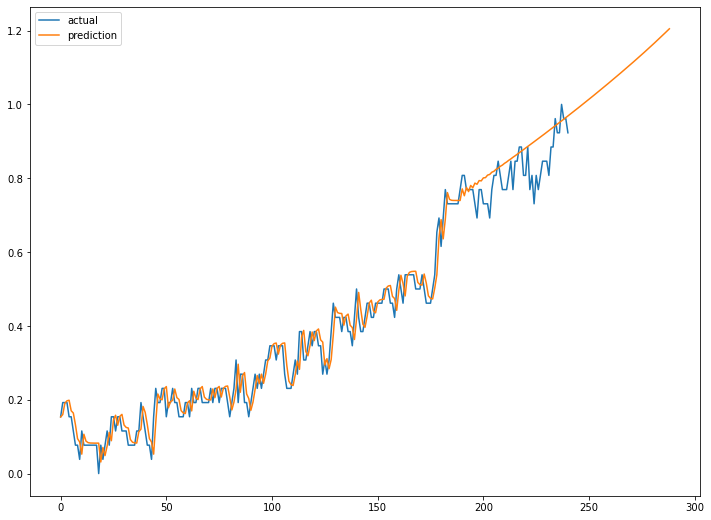

[0.12040385]


In [77]:
plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.savefig('savefig/cell7_copy4/22.png')
plt.legend()
plt.show()

loop = len(ac_test_label8) - 200
for i in range(loop):
    error_avg = 0
    error = abs((ac_test_label8[200+i] - plz_pred[200+i])/ac_test_label8[200+i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

In [78]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_23.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 10)
x_test8 = test_ds8[:200, 1:2]
y_test8 = test_ds8[:200, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)


for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[pred_len-1].reshape((1,1))
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)



(251, 4)
[array([[0.7173299]], dtype=float32)]
(1, 1)
(201, 1) (201, 1)
(201, 1) (201, 1)
[array([[0.7260763]], dtype=float32)]
(1, 1)
(202, 1) (202, 1)
(202, 1) (202, 1)
[array([[0.72613037]], dtype=float32)]
(1, 1)
(203, 1) (203, 1)
(203, 1) (203, 1)
[array([[0.7333391]], dtype=float32)]
(1, 1)
(204, 1) (204, 1)
(204, 1) (204, 1)
[array([[0.7346736]], dtype=float32)]
(1, 1)
(205, 1) (205, 1)
(205, 1) (205, 1)
[array([[0.7408463]], dtype=float32)]
(1, 1)
(206, 1) (206, 1)
(206, 1) (206, 1)
[array([[0.7430441]], dtype=float32)]
(1, 1)
(207, 1) (207, 1)
(207, 1) (207, 1)
[array([[0.7485199]], dtype=float32)]
(1, 1)
(208, 1) (208, 1)
(208, 1) (208, 1)
[array([[0.7513031]], dtype=float32)]
(1, 1)
(209, 1) (209, 1)
(209, 1) (209, 1)
[array([[0.75631154]], dtype=float32)]
(1, 1)
(210, 1) (210, 1)
(210, 1) (210, 1)
[array([[0.7594937]], dtype=float32)]
(1, 1)
(211, 1) (211, 1)
(211, 1) (211, 1)
[array([[0.76418895]], dtype=float32)]
(1, 1)
(212, 1) (212, 1)
(212, 1) (212, 1)
[array([[0.76764

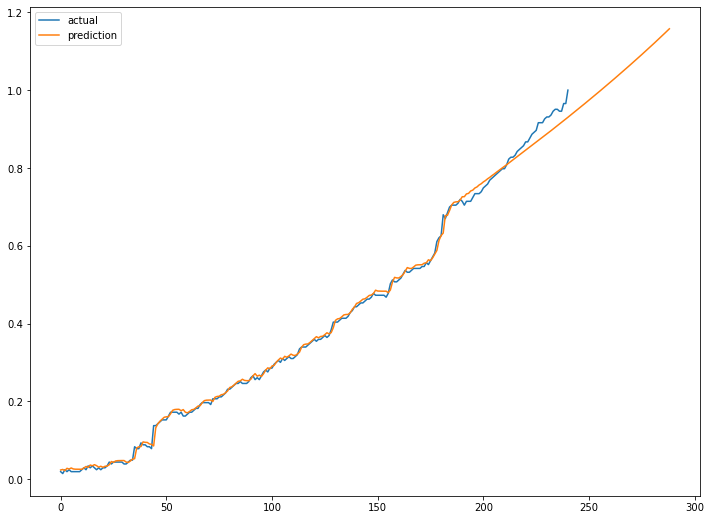

[0.17021793]


In [79]:
plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.savefig('savefig/cell7_copy4/23.png')
plt.legend()
plt.show()
loop = len(ac_test_label8) - 200
for i in range(loop):
    error_avg = 0
    error = abs((ac_test_label8[200+i] - plz_pred[200+i])/ac_test_label8[200+i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

In [80]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_20.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 10)
x_test8 = test_ds8[:200, 1:2]
y_test8 = test_ds8[:200, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)


for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[pred_len-1].reshape((1,1))
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)



(252, 4)
[array([[0.80784416]], dtype=float32)]
(1, 1)
(201, 1) (201, 1)
(201, 1) (201, 1)
[array([[0.82239115]], dtype=float32)]
(1, 1)
(202, 1) (202, 1)
(202, 1) (202, 1)
[array([[0.81797165]], dtype=float32)]
(1, 1)
(203, 1) (203, 1)
(203, 1) (203, 1)
[array([[0.82919675]], dtype=float32)]
(1, 1)
(204, 1) (204, 1)
(204, 1) (204, 1)
[array([[0.82742506]], dtype=float32)]
(1, 1)
(205, 1) (205, 1)
(205, 1) (205, 1)
[array([[0.83643997]], dtype=float32)]
(1, 1)
(206, 1) (206, 1)
(206, 1) (206, 1)
[array([[0.8365078]], dtype=float32)]
(1, 1)
(207, 1) (207, 1)
(207, 1) (207, 1)
[array([[0.8440195]], dtype=float32)]
(1, 1)
(208, 1) (208, 1)
(208, 1) (208, 1)
[array([[0.8453598]], dtype=float32)]
(1, 1)
(209, 1) (209, 1)
(209, 1) (209, 1)
[array([[0.8518402]], dtype=float32)]
(1, 1)
(210, 1) (210, 1)
(210, 1) (210, 1)
[array([[0.8540657]], dtype=float32)]
(1, 1)
(211, 1) (211, 1)
(211, 1) (211, 1)
[array([[0.8598449]], dtype=float32)]
(1, 1)
(212, 1) (212, 1)
(212, 1) (212, 1)
[array([[0.86

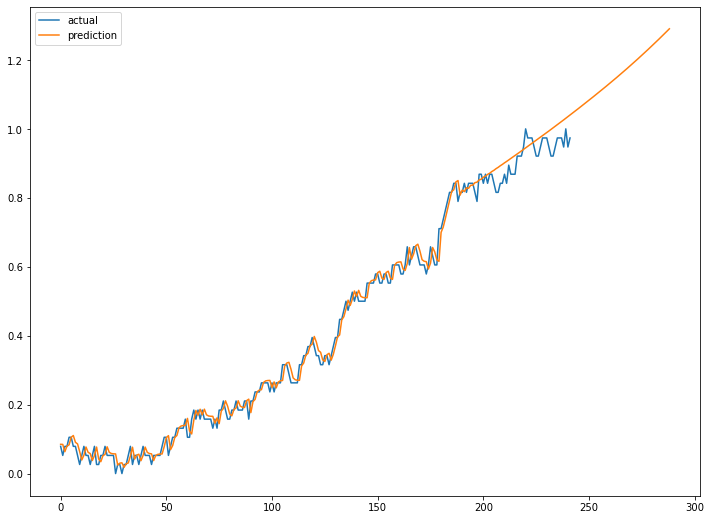

[0.16253729]


In [81]:
plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.savefig('savefig/cell7_copy4/20.png')
plt.legend()
plt.show()
loop = len(ac_test_label8) - 200
for i in range(loop):
    error_avg = 0
    error = abs((ac_test_label8[200+i] - plz_pred[200+i])/ac_test_label8[200+i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

In [82]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_19.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 10)
x_test8 = test_ds8[:200, 1:2]
y_test8 = test_ds8[:200, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)


for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[pred_len-1].reshape((1,1))
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)



(252, 4)
[array([[0.6973296]], dtype=float32)]
(1, 1)
(201, 1) (201, 1)
(201, 1) (201, 1)
[array([[0.7060585]], dtype=float32)]
(1, 1)
(202, 1) (202, 1)
(202, 1) (202, 1)
[array([[0.7059218]], dtype=float32)]
(1, 1)
(203, 1) (203, 1)
(203, 1) (203, 1)
[array([[0.71319073]], dtype=float32)]
(1, 1)
(204, 1) (204, 1)
(204, 1) (204, 1)
[array([[0.7144266]], dtype=float32)]
(1, 1)
(205, 1) (205, 1)
(205, 1) (205, 1)
[array([[0.72063935]], dtype=float32)]
(1, 1)
(206, 1) (206, 1)
(206, 1) (206, 1)
[array([[0.72277355]], dtype=float32)]
(1, 1)
(207, 1) (207, 1)
(207, 1) (207, 1)
[array([[0.72826654]], dtype=float32)]
(1, 1)
(208, 1) (208, 1)
(208, 1) (208, 1)
[array([[0.7310076]], dtype=float32)]
(1, 1)
(209, 1) (209, 1)
(209, 1) (209, 1)
[array([[0.7360181]], dtype=float32)]
(1, 1)
(210, 1) (210, 1)
(210, 1) (210, 1)
[array([[0.73916644]], dtype=float32)]
(1, 1)
(211, 1) (211, 1)
(211, 1) (211, 1)
[array([[0.74385256]], dtype=float32)]
(1, 1)
(212, 1) (212, 1)
(212, 1) (212, 1)
[array([[0.74

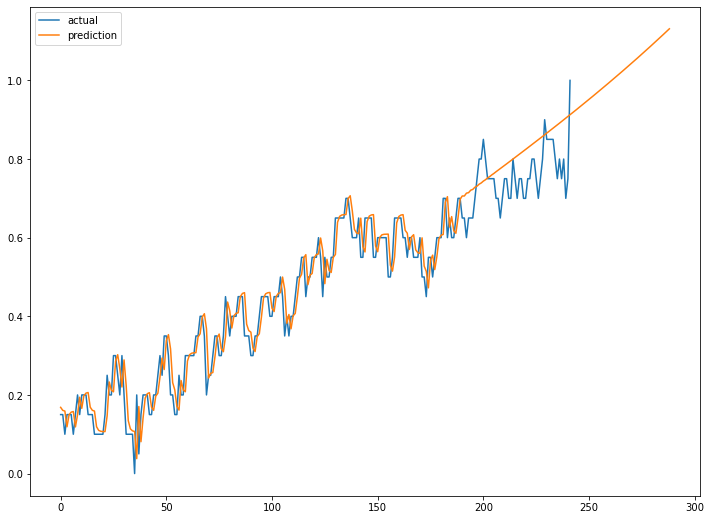

[0.20819776]


In [83]:
plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.savefig('savefig/cell7_copy4/19.png')
plt.legend()
plt.show()
loop = len(ac_test_label8) - 200
for i in range(loop):
    error_avg = 0
    error = abs((ac_test_label8[200+i] - plz_pred[200+i])/ac_test_label8[200+i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

In [84]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_18.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 10)
x_test8 = test_ds8[:200, 1:2]
y_test8 = test_ds8[:200, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)


for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[pred_len-1].reshape((1,1))
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)



(252, 4)
[array([[0.83107466]], dtype=float32)]
(1, 1)
(201, 1) (201, 1)
(201, 1) (201, 1)
[array([[0.8454612]], dtype=float32)]
(1, 1)
(202, 1) (202, 1)
(202, 1) (202, 1)
[array([[0.84109205]], dtype=float32)]
(1, 1)
(203, 1) (203, 1)
(203, 1) (203, 1)
[array([[0.8523199]], dtype=float32)]
(1, 1)
(204, 1) (204, 1)
(204, 1) (204, 1)
[array([[0.8505958]], dtype=float32)]
(1, 1)
(205, 1) (205, 1)
(205, 1) (205, 1)
[array([[0.85965616]], dtype=float32)]
(1, 1)
(206, 1) (206, 1)
(206, 1) (206, 1)
[array([[0.85976034]], dtype=float32)]
(1, 1)
(207, 1) (207, 1)
(207, 1) (207, 1)
[array([[0.86733365]], dtype=float32)]
(1, 1)
(208, 1) (208, 1)
(208, 1) (208, 1)
[array([[0.8687049]], dtype=float32)]
(1, 1)
(209, 1) (209, 1)
(209, 1) (209, 1)
[array([[0.8752589]], dtype=float32)]
(1, 1)
(210, 1) (210, 1)
(210, 1) (210, 1)
[array([[0.8775137]], dtype=float32)]
(1, 1)
(211, 1) (211, 1)
(211, 1) (211, 1)
[array([[0.8833685]], dtype=float32)]
(1, 1)
(212, 1) (212, 1)
(212, 1) (212, 1)
[array([[0.886

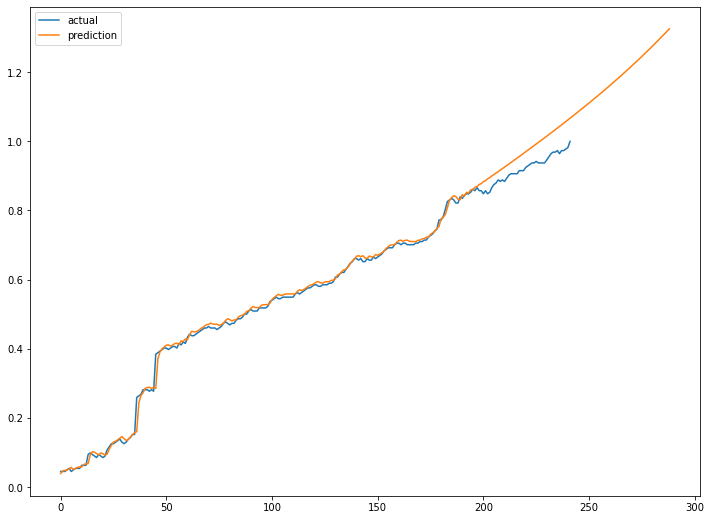

[0.15910324]


In [85]:
plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.savefig('savefig/cell7_copy4/18.png')
plt.legend()
plt.show()
loop = len(ac_test_label8) - 200
for i in range(loop):
    error_avg = 0
    error = abs((ac_test_label8[200+i] - plz_pred[200+i])/ac_test_label8[200+i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

In [86]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_9.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 10)
x_test8 = test_ds8[:200, 1:2]
y_test8 = test_ds8[:200, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)


for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[pred_len-1].reshape((1,1))
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)



(254, 4)
[array([[0.876093]], dtype=float32)]
(1, 1)
(201, 1) (201, 1)
(201, 1) (201, 1)
[array([[0.8480299]], dtype=float32)]
(1, 1)
(202, 1) (202, 1)
(202, 1) (202, 1)
[array([[0.8790072]], dtype=float32)]
(1, 1)
(203, 1) (203, 1)
(203, 1) (203, 1)
[array([[0.8608785]], dtype=float32)]
(1, 1)
(204, 1) (204, 1)
(204, 1) (204, 1)
[array([[0.88367456]], dtype=float32)]
(1, 1)
(205, 1) (205, 1)
(205, 1) (205, 1)
[array([[0.87239367]], dtype=float32)]
(1, 1)
(206, 1) (206, 1)
(206, 1) (206, 1)
[array([[0.8895412]], dtype=float32)]
(1, 1)
(207, 1) (207, 1)
(207, 1) (207, 1)
[array([[0.88300353]], dtype=float32)]
(1, 1)
(208, 1) (208, 1)
(208, 1) (208, 1)
[array([[0.8962397]], dtype=float32)]
(1, 1)
(209, 1) (209, 1)
(209, 1) (209, 1)
[array([[0.8929966]], dtype=float32)]
(1, 1)
(210, 1) (210, 1)
(210, 1) (210, 1)
[array([[0.90352464]], dtype=float32)]
(1, 1)
(211, 1) (211, 1)
(211, 1) (211, 1)
[array([[0.90257615]], dtype=float32)]
(1, 1)
(212, 1) (212, 1)
(212, 1) (212, 1)
[array([[0.9112

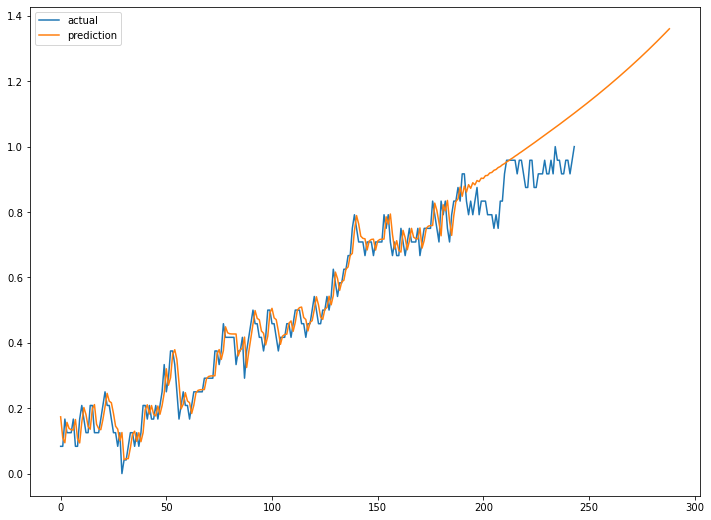

[0.23235136]


In [87]:
plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.savefig('savefig/cell7_copy4/09.png')
plt.legend()
plt.show()
loop = len(ac_test_label8) - 200
for i in range(loop):
    error_avg = 0
    error = abs((ac_test_label8[200+i] - plz_pred[200+i])/ac_test_label8[200+i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

In [88]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_7.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 10)
x_test8 = test_ds8[:200, 1:2]
y_test8 = test_ds8[:200, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)


for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[pred_len-1].reshape((1,1))
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)



(255, 4)
[array([[0.6014979]], dtype=float32)]
(1, 1)
(201, 1) (201, 1)
(201, 1) (201, 1)
[array([[0.603802]], dtype=float32)]
(1, 1)
(202, 1) (202, 1)
(202, 1) (202, 1)
[array([[0.6091992]], dtype=float32)]
(1, 1)
(203, 1) (203, 1)
(203, 1) (203, 1)
[array([[0.612066]], dtype=float32)]
(1, 1)
(204, 1) (204, 1)
(204, 1) (204, 1)
[array([[0.6169772]], dtype=float32)]
(1, 1)
(205, 1) (205, 1)
(205, 1) (205, 1)
[array([[0.6202192]], dtype=float32)]
(1, 1)
(206, 1) (206, 1)
(206, 1) (206, 1)
[array([[0.62481105]], dtype=float32)]
(1, 1)
(207, 1) (207, 1)
(207, 1) (207, 1)
[array([[0.6282994]], dtype=float32)]
(1, 1)
(208, 1) (208, 1)
(208, 1) (208, 1)
[array([[0.6326801]], dtype=float32)]
(1, 1)
(209, 1) (209, 1)
(209, 1) (209, 1)
[array([[0.6363298]], dtype=float32)]
(1, 1)
(210, 1) (210, 1)
(210, 1) (210, 1)
[array([[0.64057034]], dtype=float32)]
(1, 1)
(211, 1) (211, 1)
(211, 1) (211, 1)
[array([[0.64432573]], dtype=float32)]
(1, 1)
(212, 1) (212, 1)
(212, 1) (212, 1)
[array([[0.6484729

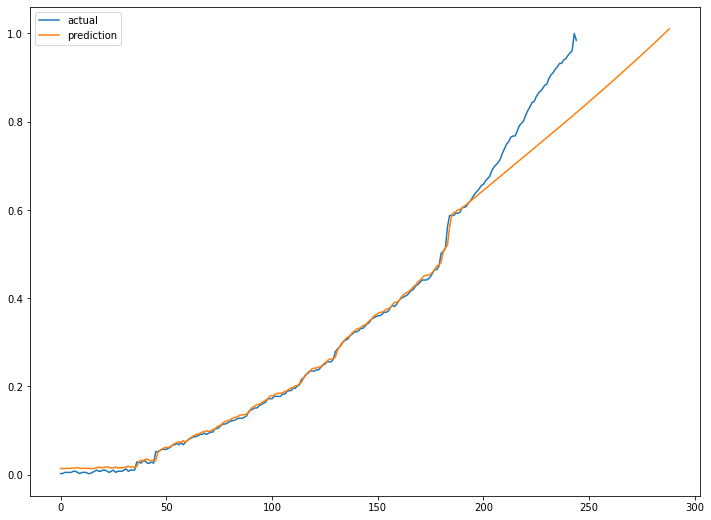

[0.36985365]


In [89]:
plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.savefig('savefig/cell7_copy4/07.png')
plt.legend()
plt.show()
loop = len(ac_test_label8) - 200
for i in range(loop):
    error_avg = 0
    error = abs((ac_test_label8[200+i] - plz_pred[200+i])/ac_test_label8[200+i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

In [90]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_06.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 10)
x_test8 = test_ds8[:200, 1:2]
y_test8 = test_ds8[:200, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)


for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[pred_len-1].reshape((1,1))
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)


(256, 4)
[array([[0.7352941]], dtype=float32)]
(1, 1)
(201, 1) (201, 1)
(201, 1) (201, 1)
[array([[0.739949]], dtype=float32)]
(1, 1)
(202, 1) (202, 1)
(202, 1) (202, 1)
[array([[0.74341595]], dtype=float32)]
(1, 1)
(203, 1) (203, 1)
(203, 1) (203, 1)
[array([[0.7478531]], dtype=float32)]
(1, 1)
(204, 1) (204, 1)
(204, 1) (204, 1)
[array([[0.7514937]], dtype=float32)]
(1, 1)
(205, 1) (205, 1)
(205, 1) (205, 1)
[array([[0.7557977]], dtype=float32)]
(1, 1)
(206, 1) (206, 1)
(206, 1) (206, 1)
[array([[0.75956094]], dtype=float32)]
(1, 1)
(207, 1) (207, 1)
(207, 1) (207, 1)
[array([[0.76377743]], dtype=float32)]
(1, 1)
(208, 1) (208, 1)
(208, 1) (208, 1)
[array([[0.7676279]], dtype=float32)]
(1, 1)
(209, 1) (209, 1)
(209, 1) (209, 1)
[array([[0.7717883]], dtype=float32)]
(1, 1)
(210, 1) (210, 1)
(210, 1) (210, 1)
[array([[0.77570194]], dtype=float32)]
(1, 1)
(211, 1) (211, 1)
(211, 1) (211, 1)
[array([[0.7798285]], dtype=float32)]
(1, 1)
(212, 1) (212, 1)
(212, 1) (212, 1)
[array([[0.78378

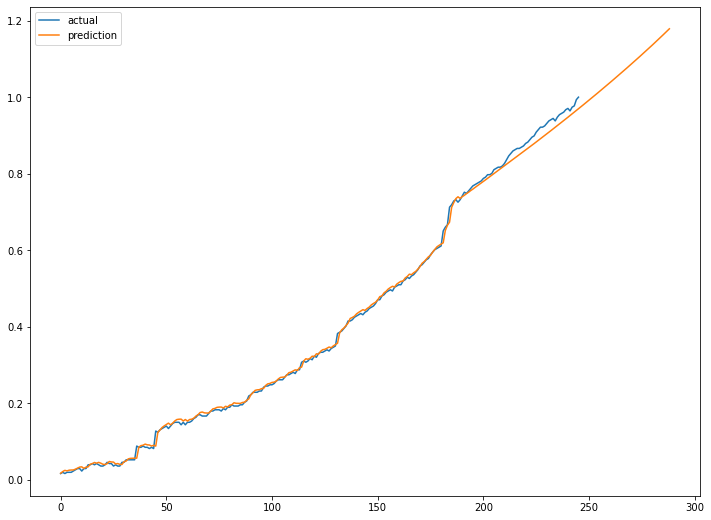

[0.06588814]


In [91]:
plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.savefig('savefig/cell7_copy4/06.png')
plt.legend()
plt.show()
loop = len(ac_test_label8) - 200
for i in range(loop):
    error_avg = 0
    error = abs((ac_test_label8[200+i] - plz_pred[200+i])/ac_test_label8[200+i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

In [92]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_03.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 10)
x_test8 = test_ds8[:200, 1:2]
y_test8 = test_ds8[:200, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)


for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[pred_len-1].reshape((1,1))
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)


(258, 3)
[array([[0.67562455]], dtype=float32)]
(1, 1)
(201, 1) (201, 1)
(201, 1) (201, 1)
[array([[0.67562455]], dtype=float32)]
(1, 1)
(202, 1) (202, 1)
(202, 1) (202, 1)
[array([[0.68286794]], dtype=float32)]
(1, 1)
(203, 1) (203, 1)
(203, 1) (203, 1)
[array([[0.68416363]], dtype=float32)]
(1, 1)
(204, 1) (204, 1)
(204, 1) (204, 1)
[array([[0.6903194]], dtype=float32)]
(1, 1)
(205, 1) (205, 1)
(205, 1) (205, 1)
[array([[0.6924944]], dtype=float32)]
(1, 1)
(206, 1) (206, 1)
(206, 1) (206, 1)
[array([[0.6979299]], dtype=float32)]
(1, 1)
(207, 1) (207, 1)
(207, 1) (207, 1)
[array([[0.70069534]], dtype=float32)]
(1, 1)
(208, 1) (208, 1)
(208, 1) (208, 1)
[array([[0.70565134]], dtype=float32)]
(1, 1)
(209, 1) (209, 1)
(209, 1) (209, 1)
[array([[0.70881367]], dtype=float32)]
(1, 1)
(210, 1) (210, 1)
(210, 1) (210, 1)
[array([[0.7134504]], dtype=float32)]
(1, 1)
(211, 1) (211, 1)
(211, 1) (211, 1)
[array([[0.7168809]], dtype=float32)]
(1, 1)
(212, 1) (212, 1)
(212, 1) (212, 1)
[array([[0.7

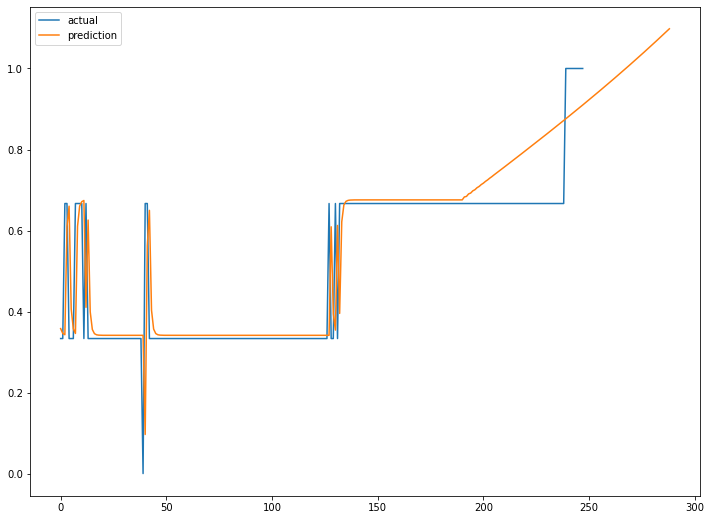

[0.18780108]


In [93]:
plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.legend()
plt.show()
loop = len(ac_test_label8) - 200
for i in range(loop):
    error_avg = 0
    error = abs((ac_test_label8[200+i] - plz_pred[200+i])/ac_test_label8[200+i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)